In [29]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
#importing total combined dataset
df = pd.read_pickle('suicide_df2.pkl')

In [31]:
df.head()

,country,year,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
0,Afghanistan,2000,1.390000,20093760.0,54.8,321.0,88.0,0.01,10.424960,6532.0,12.2,24.0,8.20,24.0,0.1,114.560000,2.3,2.5,0.338,5.5,0.029696,0.040120,0.005830,0.000694,0.000937,0.011535,0.010885,0.011772,0.033036,0.008567,5.7
1,Afghanistan,2005,2.500000,25070798.0,57.3,291.0,85.0,0.02,1.388648,1296.0,14.2,58.0,8.70,58.0,0.1,25.294130,19.3,19.5,0.396,7.9,0.029651,0.040322,0.005893,0.000729,0.000943,0.011579,0.010822,0.011880,0.030955,0.008545,6.3
2,Afghanistan,2010,1.400000,28803167.0,58.8,279.0,74.0,0.01,79.679367,1989.0,16.7,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2,0.029793,0.040746,0.005900,0.000798,0.000963,0.011704,0.011079,0.011920,0.028759,0.008593,5.1
3,Afghanistan,2015,1.100000,33736494.0,65.0,263.0,62.0,0.01,71.279624,1154.0,19.1,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0.031112,0.042413,0.006241,0.000906,0.001018,0.011976,0.011279,0.012532,0.027784,0.008775,4.8
4,Albania,2000,2.978571,3089030.0,72.6,11.0,1.0,3.66,91.711541,662.0,45.0,97.0,6.26,97.0,0.1,1175.788981,2.1,2.2,0.656,10.7,0.021446,0.032947,0.006136,0.000867,0.002036,0.008546,0.009118,0.017761,0.013201,0.008736,5.5


In [32]:
df.corr()

,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
corruption,1.000000,-0.079753,0.481317,-0.275906,-0.055561,0.360064,0.492889,-0.109483,0.247748,0.225259,0.272988,0.217934,-0.110330,0.526273,-0.307956,-0.303608,0.518742,0.511392,0.394940,0.448604,0.463005,0.587166,0.487671,-0.215839,-0.492339,0.487454,-0.434419,-0.185578,0.284129
population,-0.079753,1.000000,0.008070,-0.016516,0.686518,-0.038749,-0.049881,0.476517,-0.135423,0.001683,-0.085677,0.005146,-0.048427,-0.057266,0.295353,0.292599,-0.043280,-0.057109,0.029216,-0.042817,-0.168381,-0.081582,0.265955,-0.092904,-0.101636,0.013417,0.125799,0.037420,0.057895
life_expectancy,0.481317,0.008070,1.000000,-0.666703,-0.132668,0.400168,0.433007,-0.176048,0.568570,0.504253,0.201080,0.489719,-0.541743,0.461517,-0.479514,-0.487631,0.852303,0.795779,0.429423,0.624664,0.691339,0.687041,0.738272,-0.432135,-0.745646,0.796543,-0.814163,-0.025081,0.173266
adult_mortality,-0.275906,-0.016516,-0.666703,1.000000,0.041333,-0.201893,-0.272644,0.066274,-0.358839,-0.282030,-0.107207,-0.264211,0.520744,-0.294302,0.299190,0.328762,-0.508451,-0.442440,-0.205289,-0.418694,-0.459343,-0.462755,-0.488319,0.250332,0.485918,-0.511272,0.516045,-0.010555,0.020812
infant_deaths,-0.055561,0.686518,-0.132668,0.041333,1.000000,-0.076275,0.055866,0.437697,-0.177214,-0.120468,-0.098604,-0.138860,0.006937,-0.004826,0.443372,0.447436,-0.134383,-0.146531,-0.014390,-0.059447,-0.166153,-0.078561,0.018744,-0.106023,0.029982,-0.101538,0.236508,0.019064,0.041065
alcohol,0.360064,-0.038749,0.400168,-0.201893,-0.076275,1.000000,0.390854,-0.021344,0.318736,0.226685,0.298995,0.194393,-0.040107,0.345746,-0.413095,-0.391315,0.526136,0.563028,0.531086,0.390669,0.508762,0.479212,0.476648,-0.208701,-0.572598,0.604967,-0.490974,-0.303018,0.527081
percentage_expenditure,0.492889,-0.049881,0.433007,-0.272644,0.055866,0.390854,1.000000,-0.059102,0.289997,0.196225,0.229948,0.157286,-0.124298,0.793103,-0.300900,-0.302234,0.488778,0.478872,0.325172,0.489133,0.439211,0.595133,0.439605,-0.227528,-0.456168,0.465002,-0.394855,-0.224078,0.221430
measles,-0.109483,0.476517,-0.176048,0.066274,0.437697,-0.021344,-0.059102,1.000000,-0.170072,-0.098656,-0.112823,-0.092346,0.094987,-0.072705,0.230902,0.214292,-0.163731,-0.141258,-0.038446,-0.129160,-0.193860,-0.138477,0.022152,0.046434,0.057348,-0.110175,0.215020,0.006018,0.008000
bmi,0.247748,-0.135423,0.568570,-0.358839,-0.177214,0.318736,0.289997,-0.170072,1.000000,0.305857,0.137304,0.265885,-0.261140,0.326304,-0.515639,-0.527004,0.594728,0.600742,0.371810,0.479488,0.511822,0.471446,0.414140,-0.120363,-0.475843,0.550136,-0.577841,0.057622,0.171139
polio,0.225259,0.001683,0.504253,-0.282030,-0.120468,0.226685,0.196225,-0.098656,0.305857,1.000000,0.083160,0.657029,-0.210977,0.241360,-0.213382,-0.219613,0.464771,0.436554,0.277538,0.297287,0.359546,0.329141,0.382426,-0.271772,-0.407686,0.463419,-0.412961,0.039940,0.172043


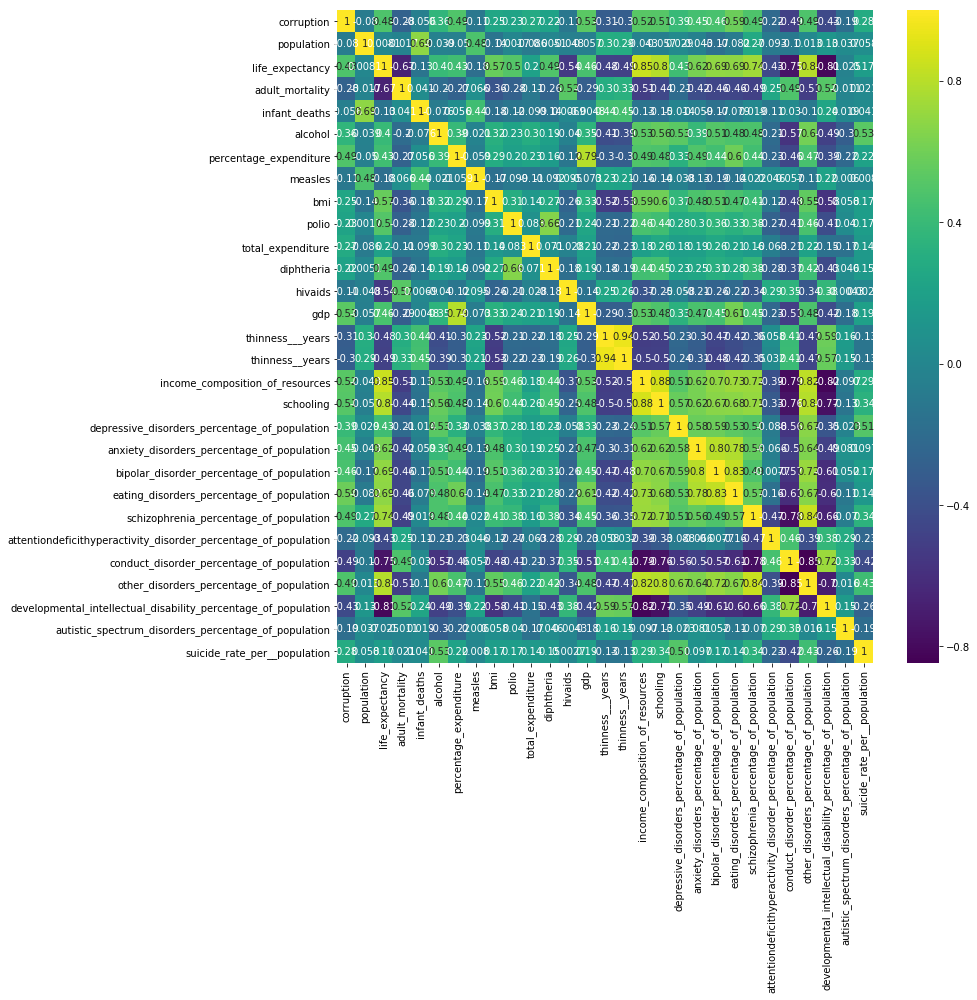

In [33]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [37]:
df.head()

,country,year,corruption,population,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,bmi,polio,total_expenditure,diphtheria,hivaids,gdp,thinness___years,thinness__years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
0,Afghanistan,2000,1.390000,20093760.0,54.8,321.0,88.0,0.01,10.424960,6532.0,12.2,24.0,8.20,24.0,0.1,114.560000,2.3,2.5,0.338,5.5,0.029696,0.040120,0.005830,0.000694,0.000937,0.011535,0.010885,0.011772,0.033036,0.008567,5.7
1,Afghanistan,2005,2.500000,25070798.0,57.3,291.0,85.0,0.02,1.388648,1296.0,14.2,58.0,8.70,58.0,0.1,25.294130,19.3,19.5,0.396,7.9,0.029651,0.040322,0.005893,0.000729,0.000943,0.011579,0.010822,0.011880,0.030955,0.008545,6.3
2,Afghanistan,2010,1.400000,28803167.0,58.8,279.0,74.0,0.01,79.679367,1989.0,16.7,66.0,9.20,66.0,0.1,553.328940,18.4,18.4,0.448,9.2,0.029793,0.040746,0.005900,0.000798,0.000963,0.011704,0.011079,0.011920,0.028759,0.008593,5.1
3,Afghanistan,2015,1.100000,33736494.0,65.0,263.0,62.0,0.01,71.279624,1154.0,19.1,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0.031112,0.042413,0.006241,0.000906,0.001018,0.011976,0.011279,0.012532,0.027784,0.008775,4.8
4,Albania,2000,2.978571,3089030.0,72.6,11.0,1.0,3.66,91.711541,662.0,45.0,97.0,6.26,97.0,0.1,1175.788981,2.1,2.2,0.656,10.7,0.021446,0.032947,0.006136,0.000867,0.002036,0.008546,0.009118,0.017761,0.013201,0.008736,5.5


### Plotting each feature against the target variable:

country


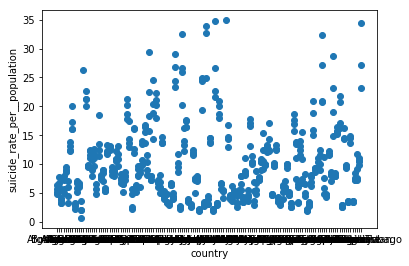

year


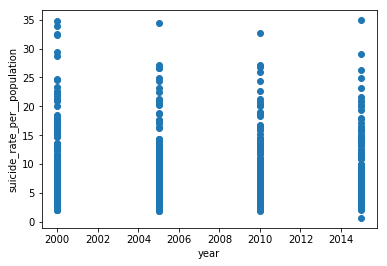

corruption


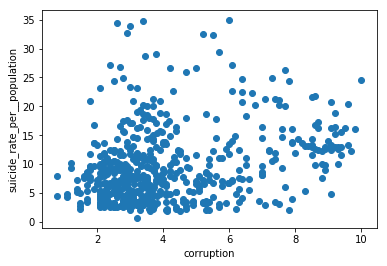

population


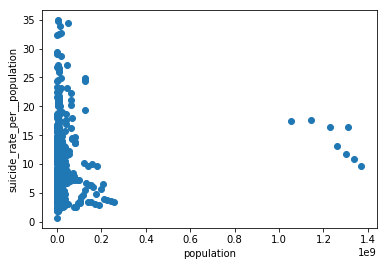

life_expectancy


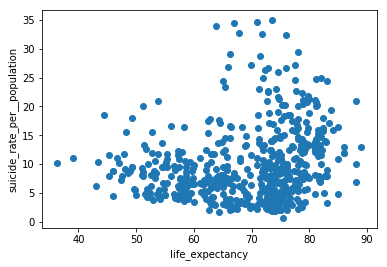

adult_mortality


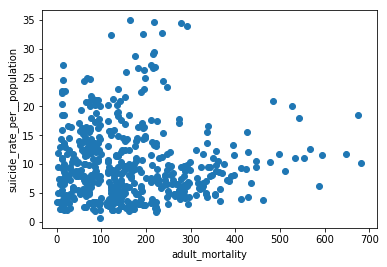

infant_deaths


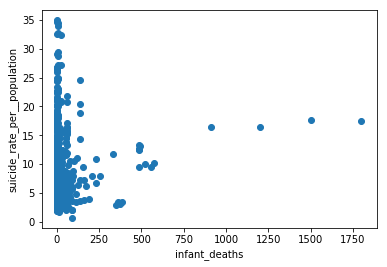

alcohol


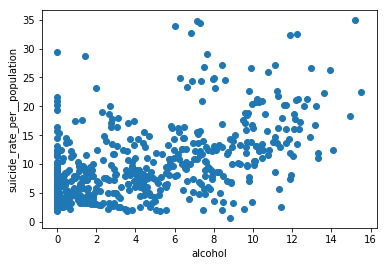

percentage_expenditure


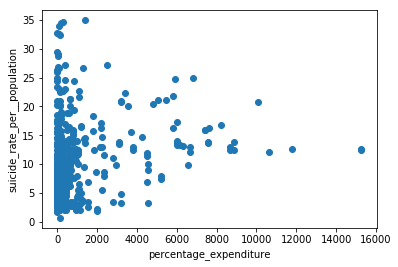

measles


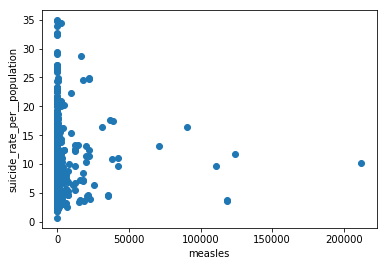

bmi


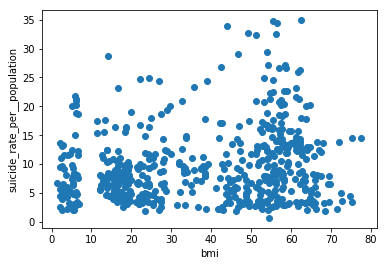

polio


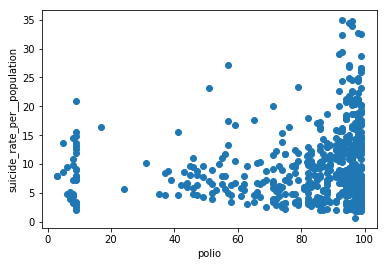

total_expenditure


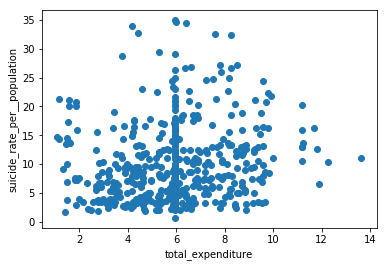

diphtheria


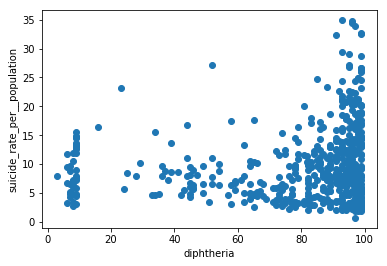

hivaids


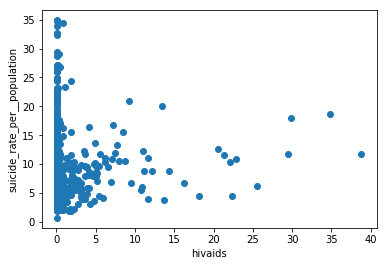

gdp


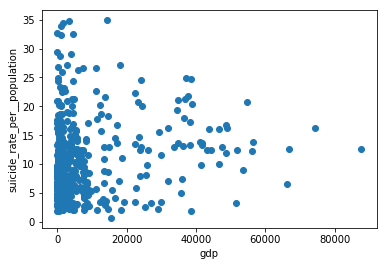

thinness___years


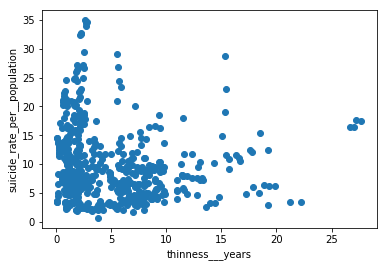

thinness__years


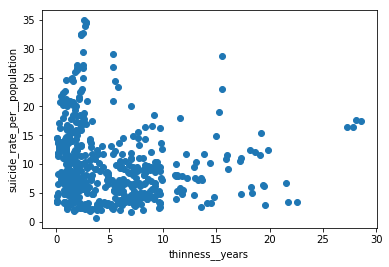

income_composition_of_resources


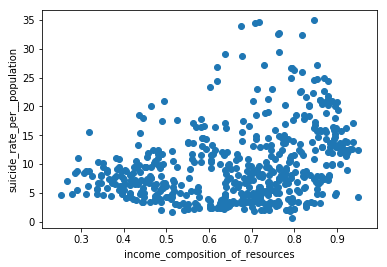

schooling


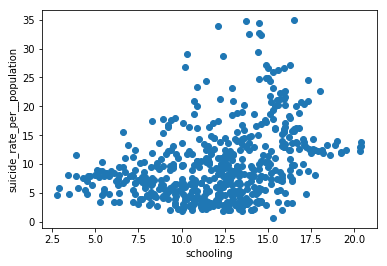

depressive_disorders_percentage_of_population


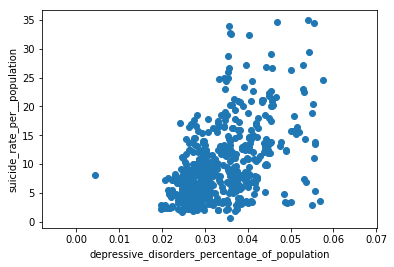

anxiety_disorders_percentage_of_population


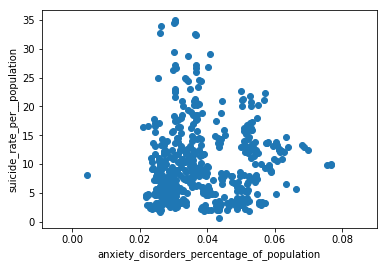

bipolar_disorder_percentage_of_population


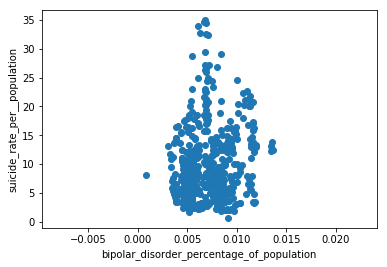

eating_disorders_percentage_of_population


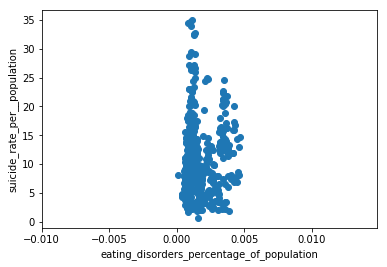

schizophrenia_percentage_of_population


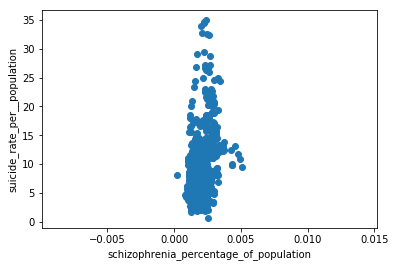

attentiondeficithyperactivity_disorder_percentage_of_population


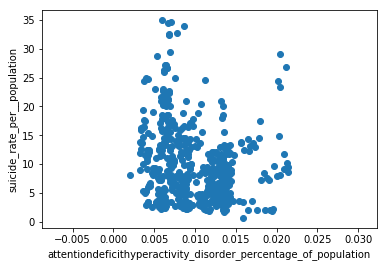

conduct_disorder_percentage_of_population


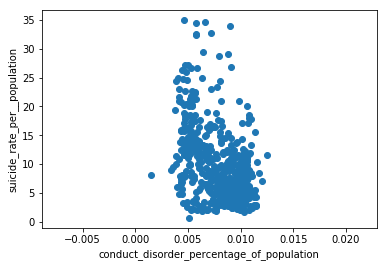

other_disorders_percentage_of_population


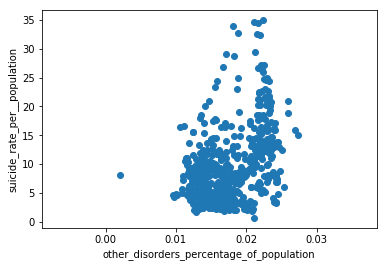

developmental_intellectual_disability_percentage_of_population


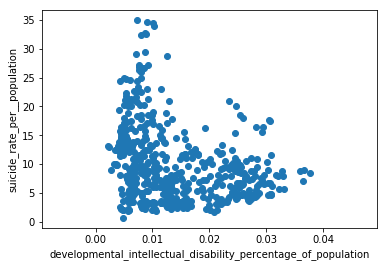

autistic_spectrum_disorders_percentage_of_population


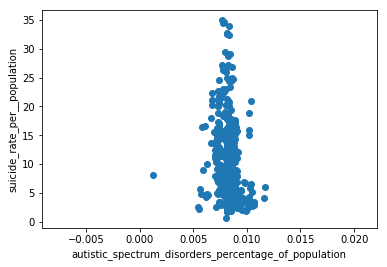

SyntaxError: 'return' outside function (<ipython-input-38-ebd44ec949b3>, line 10)

In [38]:
for i in range(df.shape[1]-1):
    try:
        print(df.columns[i])
        plt.scatter(df.iloc[:, i], df.iloc[:, 30])
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[30])
        plt.show()
    except:
        pass
return image

### Normalising the target variable

In [40]:
predictor = df['suicide_rate_per__population']

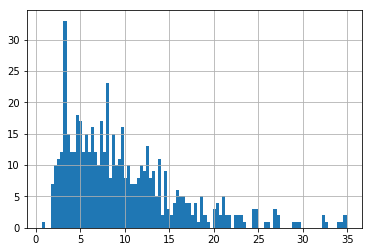

In [41]:
ax = predictor.hist(bins=100)

In [42]:
dfnorm = df
dfnorm.iloc[:, -1] = df.iloc[:, -1].apply(np.log)

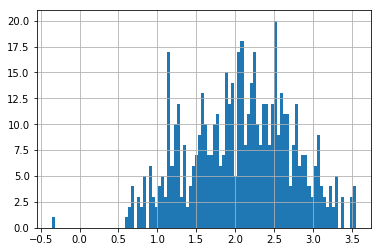

In [43]:
ax = predictor.hist(bins=100)

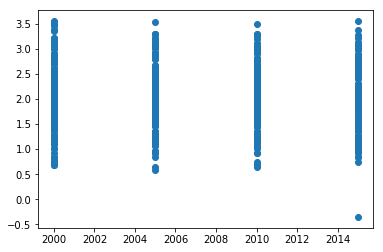

In [44]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 30])

In [45]:
#turning the list of column names into a format compatible with patsy for basic OLS linear regression model 
def create_patsy_matrix (column_list):
    string = 'suicide_rate_per__population ~ '
    for column in column_list[:-1]:
        string += column + ' + '
    
    return string[:-2]

In [46]:
create_patsy_matrix(df.columns)

'suicide_rate_per__population ~ country + year + corruption + population + life_expectancy + adult_mortality + infant_deaths + alcohol + percentage_expenditure + measles + bmi + polio + total_expenditure + diphtheria + hivaids + gdp + thinness___years + thinness__years + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population '

### Model 1 - Checking P-Values with untransformed data

In [47]:
y, X = patsy.dmatrices('suicide_rate_per__population ~ corruption + population + life_expectancy + adult_mortality + infant_deaths + alcohol + percentage_expenditure + measles + bmi + polio + total_expenditure + diphtheria + hivaids + gdp + thinness___years + thinness__years + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population ', data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
model = sm.OLS(y_train, X_train)

fit = model.fit()

fit.summary()
y_predicted = fit.predict(X_test)
residuals = y_test.iloc[:,0] - y_predicted

In [48]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     suicide_rate_per__population   R-squared:                       0.480
Model:                                      OLS   Adj. R-squared:                  0.436
Method:                           Least Squares   F-statistic:                     11.12
Date:                          Sun, 21 Apr 2019   Prob (F-statistic):           2.26e-33
Time:                                  22:20:26   Log-Likelihood:                -242.67
No. Observations:                           367   AIC:                             543.3
Df Residuals:                               338   BIC:                             656.6
Df Model:                                    28                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           2.6016      0.652      3.990      0.000       1.319       3.884
corruption                                                          0.0505      0.017      2.920      0.004       0.016       0.084
population                                                       5.118e-10   3.03e-10      1.690      0.092   -8.41e-11    1.11e-09
life_expectancy                                                    -0.0237      0.009     -2.748      0.006      -0.041      -0.007
adult_mortality                                                     0.0012      0.000      3.612      0.000       0.001       0.002
infant_deaths                                                    3.046e-05      0.000      0.105      0.916      -0.001       0.001
alcohol                                                             0.0462      0.010      4.711      0.000       0.027       0.065
percentage_expenditure                                           5.819e-05   2.18e-05      2.671      0.008    1.53e-05       0.000
measles                                                         -1.112e-06   1.92e-06     -0.580      0.562   -4.89e-06    2.66e-06
bmi                                                                 0.0022      0.002      1.252      0.212      -0.001       0.006
polio                                                               0.0006      0.001      0.438      0.662      -0.002       0.003
total_expenditure                                                   0.0067      0.015      0.445      0.657      -0.023       0.036
diphtheria                                                         -0.0011      0.001     -0.751      0.453      -0.004       0.002
hivaids                                                            -0.0119      0.011     -1.126      0.261      -0.033       0.009
gdp                                                             -4.793e-06    3.4e-06     -1.411      0.159   -1.15e-05    1.89e-06
thinness___years                                                    0.0282      0.016      1.797      0.073      -0.003       0.059
thinness__years                                                    -0.0147      0.016     -0.943      0.346      -0.045       0.016
income_composition_of_resources                                    -0.3702      0.384     -0.963      0.336      -1.126       0.386
schooling                                                          -0.0133      0.018     -0.720      0.472      -0.050       0.023
depressive_disorders_percentage_of_population                      28

In [84]:
#calculating root mean squared error for model 1
rmse = sqrt(mean_squared_error(y_test, y_predicted))

In [50]:
rmse

0.4664787774183629

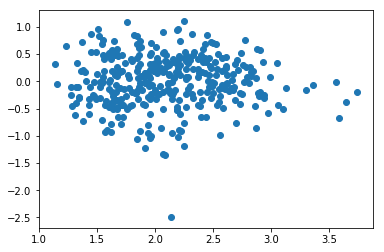

In [83]:
#visualising residuals
plt.figure(figsize=(6,4))
plt.scatter(fit.predict(), fit.resid);

### Model 2 - Checking P-Values with Transformed Y

In [85]:
#OLS model 2 with logged Y variable
y, X = patsy.dmatrices('suicide_rate_per__population ~ corruption + population + life_expectancy + adult_mortality + infant_deaths + alcohol + percentage_expenditure + measles + bmi + polio + total_expenditure + diphtheria + hivaids + gdp + thinness___years + thinness__years + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population ', data=dfnorm, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
model = sm.OLS(y_train, X_train)

fit = model.fit()

fit.summary()
y_predicted = fit.predict(X_test)
residuals = y_test.iloc[:,0] - y_predicted

In [53]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     suicide_rate_per__population   R-squared:                       0.480
Model:                                      OLS   Adj. R-squared:                  0.436
Method:                           Least Squares   F-statistic:                     11.12
Date:                          Sun, 21 Apr 2019   Prob (F-statistic):           2.26e-33
Time:                                  22:20:35   Log-Likelihood:                -242.67
No. Observations:                           367   AIC:                             543.3
Df Residuals:                               338   BIC:                             656.6
Df Model:                                    28                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           2.6016      0.652      3.990      0.000       1.319       3.884
corruption                                                          0.0505      0.017      2.920      0.004       0.016       0.084
population                                                       5.118e-10   3.03e-10      1.690      0.092   -8.41e-11    1.11e-09
life_expectancy                                                    -0.0237      0.009     -2.748      0.006      -0.041      -0.007
adult_mortality                                                     0.0012      0.000      3.612      0.000       0.001       0.002
infant_deaths                                                    3.046e-05      0.000      0.105      0.916      -0.001       0.001
alcohol                                                             0.0462      0.010      4.711      0.000       0.027       0.065
percentage_expenditure                                           5.819e-05   2.18e-05      2.671      0.008    1.53e-05       0.000
measles                                                         -1.112e-06   1.92e-06     -0.580      0.562   -4.89e-06    2.66e-06
bmi                                                                 0.0022      0.002      1.252      0.212      -0.001       0.006
polio                                                               0.0006      0.001      0.438      0.662      -0.002       0.003
total_expenditure                                                   0.0067      0.015      0.445      0.657      -0.023       0.036
diphtheria                                                         -0.0011      0.001     -0.751      0.453      -0.004       0.002
hivaids                                                            -0.0119      0.011     -1.126      0.261      -0.033       0.009
gdp                                                             -4.793e-06    3.4e-06     -1.411      0.159   -1.15e-05    1.89e-06
thinness___years                                                    0.0282      0.016      1.797      0.073      -0.003       0.059
thinness__years                                                    -0.0147      0.016     -0.943      0.346      -0.045       0.016
income_composition_of_resources                                    -0.3702      0.384     -0.963      0.336      -1.126       0.386
schooling                                                          -0.0133      0.018     -0.720      0.472      -0.050       0.023
depressive_disorders_percentage_of_population                      28

In [54]:
#calculating root mean squared error for model 2
rmse = sqrt(mean_squared_error(y_test, y_predicted))

rmse

0.4664787774183629

# Model 3 - Checking P-Values with Logged Features

In [55]:
#importing original total combined dataset
log_df = pd.read_pickle('suicide_df2.pkl')

In [56]:
#creating version of dataframe with every variable logged
for i in range(2, log_df.shape[1]-1):
    log_df.iloc[:, i] = log_df.iloc[:, i].apply(np.log)

In [57]:
log_df.iloc[:, -1] = log_df.iloc[:, -1].apply(np.log)

In [58]:
#OLS model 3 with all variables logged
y, X = patsy.dmatrices('suicide_rate_per__population ~ corruption + population + life_expectancy + adult_mortality + infant_deaths + alcohol + percentage_expenditure + measles + bmi + polio + total_expenditure + diphtheria + hivaids + gdp + thinness___years + thinness__years + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population', data=log_df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
model = sm.OLS(y_train, X_train)

fit = model.fit()

fit.summary()
y_predicted = fit.predict(X_test)
residuals = y_test.iloc[:,0] - y_predicted

In [59]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     suicide_rate_per__population   R-squared:                       0.468
Model:                                      OLS   Adj. R-squared:                  0.424
Method:                           Least Squares   F-statistic:                     10.62
Date:                          Sun, 21 Apr 2019   Prob (F-statistic):           6.70e-32
Time:                                  22:23:09   Log-Likelihood:                -246.69
No. Observations:                           367   AIC:                             551.4
Df Residuals:                               338   BIC:                             664.6
Df Model:                                    28                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           6.1200      2.719      2.251      0.025       0.771      11.469
corruption                                                          0.2026      0.072      2.806      0.005       0.061       0.345
population                                                          0.0572      0.019      3.091      0.002       0.021       0.094
life_expectancy                                                    -1.9262      0.546     -3.530      0.000      -2.999      -0.853
adult_mortality                                                     0.0983      0.032      3.094      0.002       0.036       0.161
infant_deaths                                                      -0.0433      0.020     -2.181      0.030      -0.082      -0.004
alcohol                                                             0.0461      0.013      3.437      0.001       0.020       0.072
percentage_expenditure                                              0.0221      0.025      0.879      0.380      -0.027       0.071
measles                                                            -0.0036      0.011     -0.316      0.752      -0.026       0.019
bmi                                                                 0.0461      0.037      1.234      0.218      -0.027       0.120
polio                                                              -0.0057      0.047     -0.122      0.903      -0.097       0.086
total_expenditure                                                   0.0117      0.073      0.160      0.873      -0.132       0.156
diphtheria                                                         -0.0314      0.047     -0.673      0.501      -0.123       0.060
hivaids                                                            -0.0377      0.037     -1.021      0.308      -0.110       0.035
gdp                                                                -0.0411      0.027     -1.495      0.136      -0.095       0.013
thinness___years                                                    0.1620      0.086      1.877      0.061      -0.008       0.332
thinness__years                                                    -0.1559      0.085     -1.833      0.068      -0.323       0.011
income_composition_of_resources                                    -0.1981      0.219     -0.904      0.367      -0.629       0.233
schooling                                                          -0.0141      0.159     -0.089      0.929      -0.327       0.298
depressive_disorders_percentage_of_population                       1

In [60]:
#calculating root mean squared error for model 3
rmse = sqrt(mean_squared_error(y_test, y_predicted))
rmse

0.4382383188346298

country


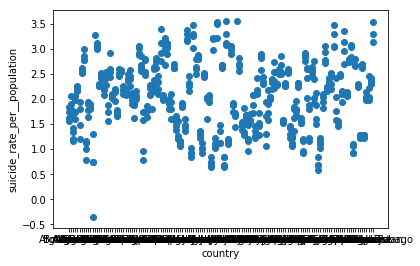

year


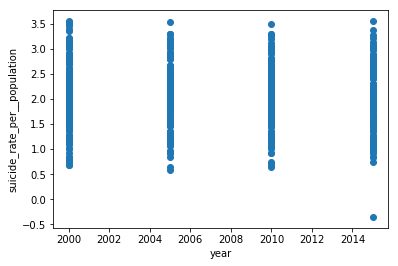

corruption


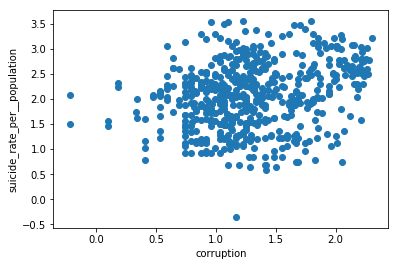

population


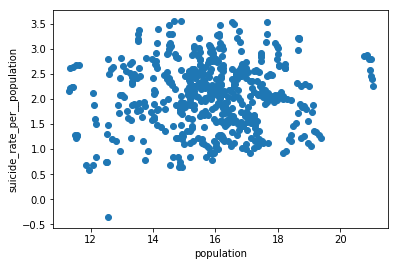

life_expectancy


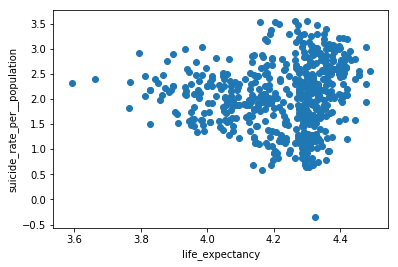

adult_mortality


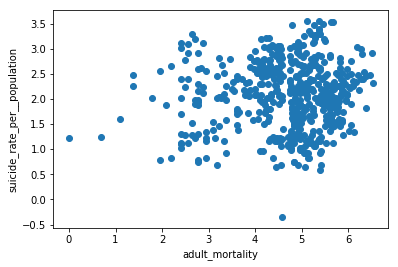

infant_deaths


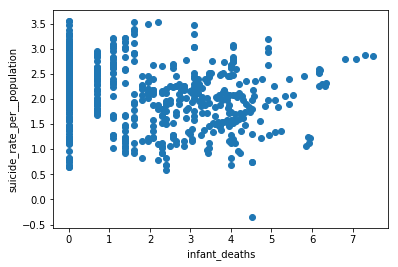

alcohol


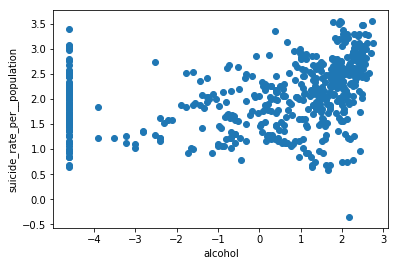

percentage_expenditure


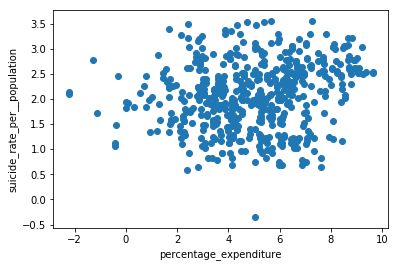

measles


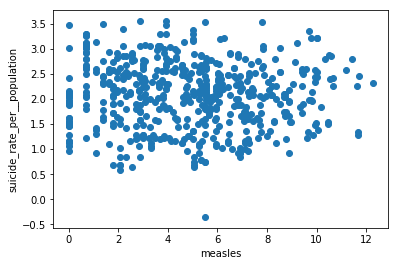

bmi


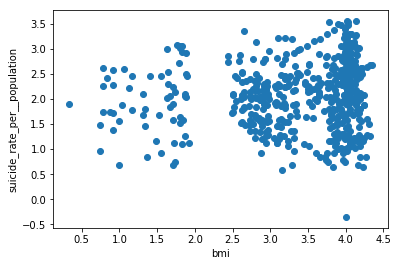

polio


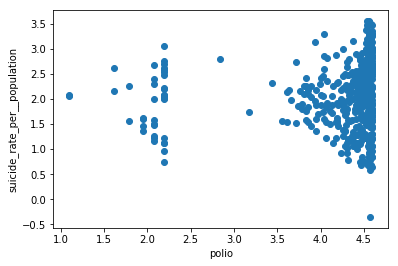

total_expenditure


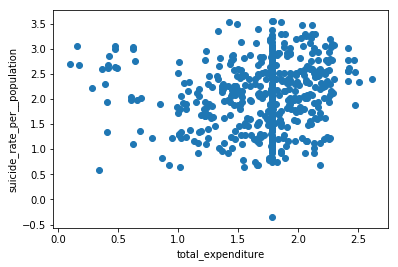

diphtheria


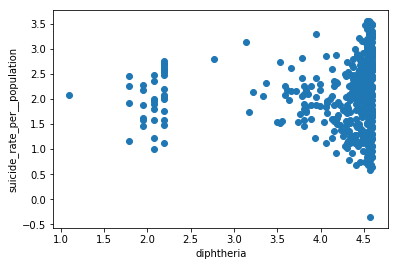

hivaids


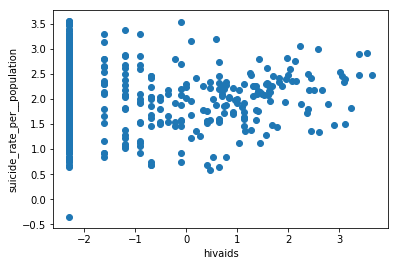

gdp


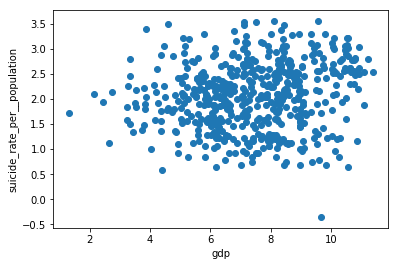

thinness___years


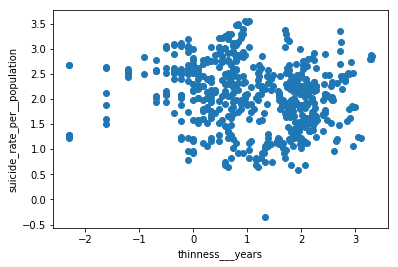

thinness__years


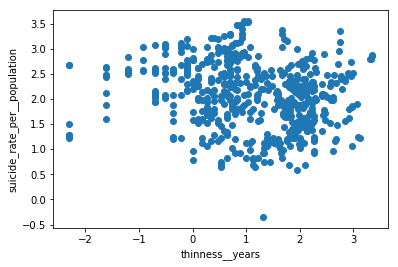

income_composition_of_resources


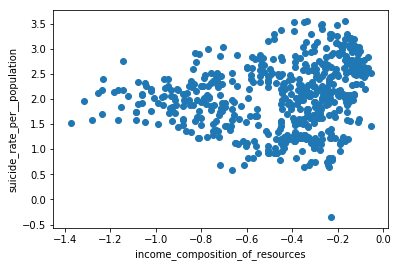

schooling


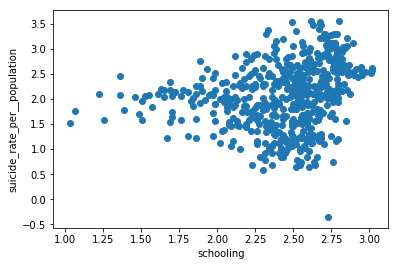

depressive_disorders_percentage_of_population


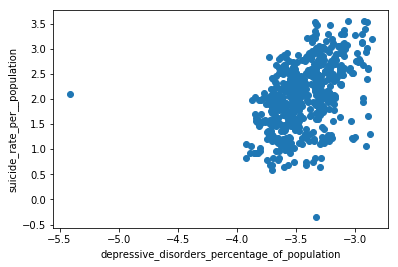

anxiety_disorders_percentage_of_population


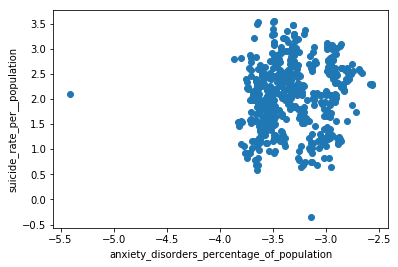

bipolar_disorder_percentage_of_population


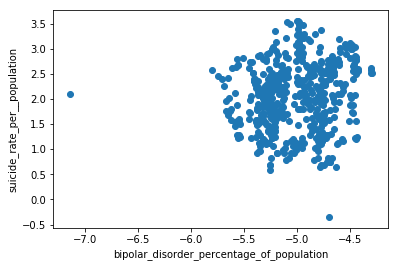

eating_disorders_percentage_of_population


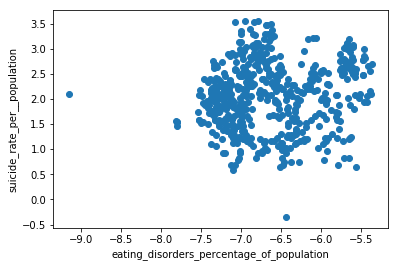

schizophrenia_percentage_of_population


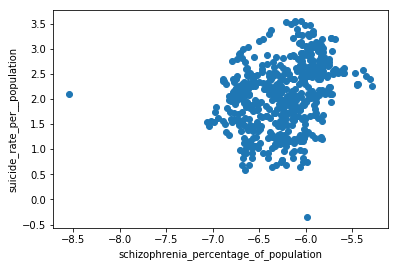

attentiondeficithyperactivity_disorder_percentage_of_population


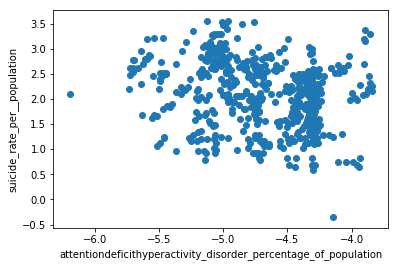

conduct_disorder_percentage_of_population


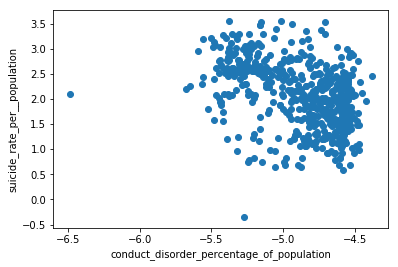

other_disorders_percentage_of_population


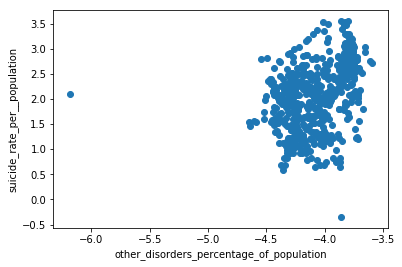

developmental_intellectual_disability_percentage_of_population


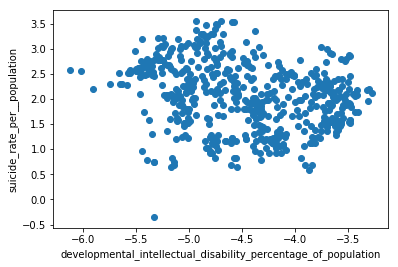

autistic_spectrum_disorders_percentage_of_population


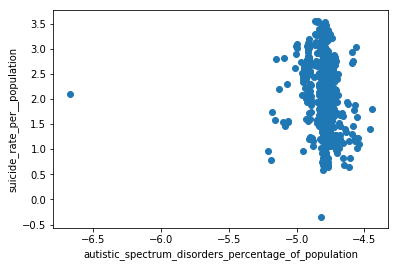

<Figure size 432x288 with 0 Axes>

In [61]:
#Plotting each logged feature against the target variable:
for i in range(log_df.shape[1]-1):
    try:
        print(log_df.columns[i])
        plt.scatter(log_df.iloc[:, i], log_df.iloc[:, 30])
        plt.xlabel(log_df.columns[i])
        plt.ylabel(log_df.columns[30])
        plt.show()
        plt.savefig('log.png')
    except:
        pass

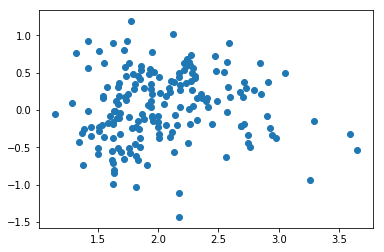

In [86]:
#visualising residuals
plt.scatter(y_predicted, residuals)

In [64]:
log_df.to_pickle('model2_df.pkl')

# Model 4 - Checking P-Values with Squared Features

In [65]:
#importing original total combined dataset 
sq_df = pd.read_pickle('suicide_df2.pkl')

In [66]:
#creating version of dataframe with every variable squared
for i in range(2, sq_df.shape[1]-1):
    sq_df.iloc[:, i] = sq_df.iloc[:, i].apply(lambda x: x**2)

In [68]:
#OLS model 4 with all variables squared
y, X = patsy.dmatrices('suicide_rate_per__population ~ corruption + population + life_expectancy + adult_mortality + infant_deaths + alcohol + percentage_expenditure + measles + bmi + polio + total_expenditure + diphtheria + hivaids + gdp + thinness___years + thinness__years + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population ', data=sq_df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=49)
model = sm.OLS(y_train, X_train)

fit = model.fit()

fit.summary()
y_predicted = fit.predict(X_test)
residuals = y_test.iloc[:,0] - y_predicted


In [69]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     suicide_rate_per__population   R-squared:                       0.112
Model:                                      OLS   Adj. R-squared:                  0.089
Method:                           Least Squares   F-statistic:                     4.993
Date:                          Sun, 21 Apr 2019   Prob (F-statistic):           2.41e-06
Time:                                  22:24:21   Log-Likelihood:                -1191.9
No. Observations:                           367   AIC:                             2404.
Df Residuals:                               357   BIC:                             2443.
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                        3.031e-06   8.18e-07      3.707      0.000    1.42e-06    4.64e-06
corruption                                                        5.74e-06    1.7e-06      3.385      0.001    2.41e-06    9.07e-06
population                                                       3.631e-18   3.26e-18      1.115      0.266   -2.77e-18       1e-17
life_expectancy                                                     0.0011      0.000      4.221      0.000       0.001       0.002
adult_mortality                                                  2.588e-05   5.09e-06      5.090      0.000    1.59e-05    3.59e-05
infant_deaths                                                    2.027e-06    8.4e-06      0.241      0.809   -1.45e-05    1.85e-05
alcohol                                                          6.927e-06   1.25e-06      5.534      0.000    4.47e-06    9.39e-06
percentage_expenditure                                           1.426e-08   2.24e-08      0.636      0.525   -2.99e-08    5.84e-08
measles                                                         -2.044e-10   2.62e-10     -0.780      0.436    -7.2e-10    3.11e-10
bmi                                                                 0.0004      0.000      1.594      0.112    -9.6e-05       0.001
polio                                                               0.0002      0.000      0.881      0.379      -0.000       0.001
total_expenditure                                                8.671e-06   2.42e-06      3.584      0.000    3.91e-06    1.34e-05
diphtheria                                                          0.0002      0.000      0.818      0.414      -0.000       0.001
hivaids                                                         -7.994e-06   3.29e-06     -2.433      0.015   -1.45e-05   -1.53e-06
gdp                                                               4.02e-10   6.61e-10      0.608      0.544   -8.98e-10     1.7e-09
thinness___years                                                 3.695e-06   6.34e-06      0.583      0.560   -8.78e-06    1.62e-05
thinness__years                                                  3.479e-06    6.4e-06      0.544      0.587   -9.11e-06    1.61e-05
income_composition_of_resources                                  1.012e-07   1.86e-08      5.434      0.000    6.46e-08    1.38e-07
schooling                                                        3.269e-05   5.54e-06      5.904      0.000    2.18e-05    4.36e-05
depressive_disorders_percentage_of_population                    2.11

In [70]:
#calculating root mean squared error for model 4
rmse = sqrt(mean_squared_error(y_test, y_predicted))
rmse

5.775410253907592

country


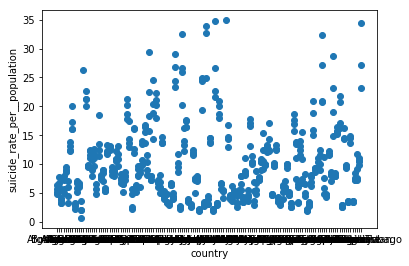

year


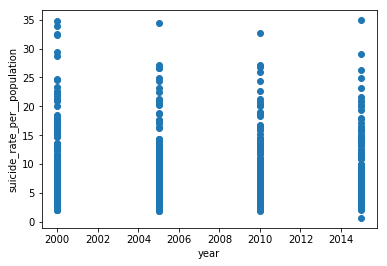

corruption


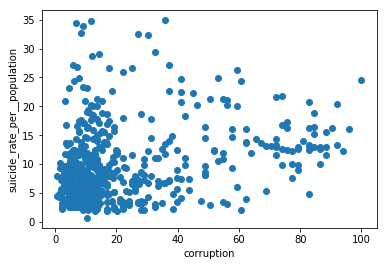

population


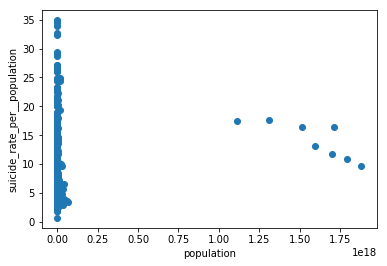

life_expectancy


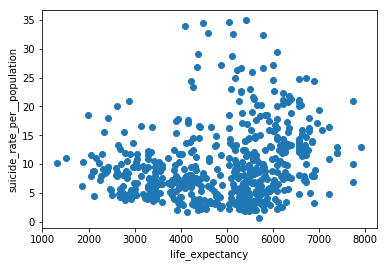

adult_mortality


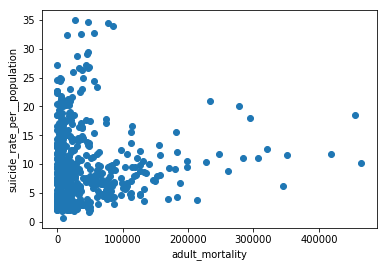

infant_deaths


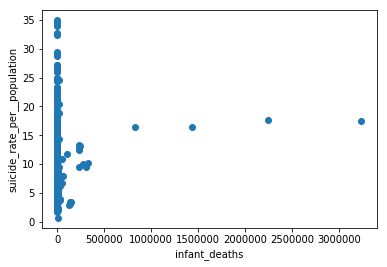

alcohol


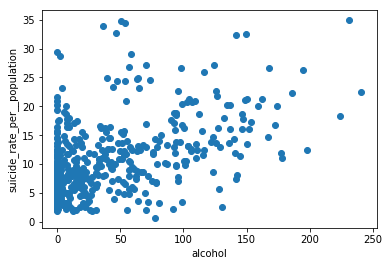

percentage_expenditure


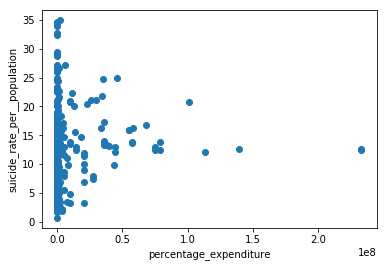

measles


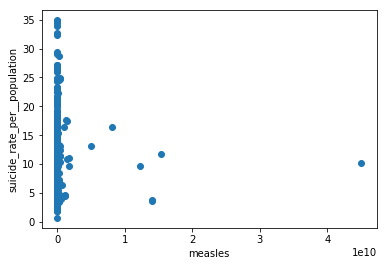

bmi


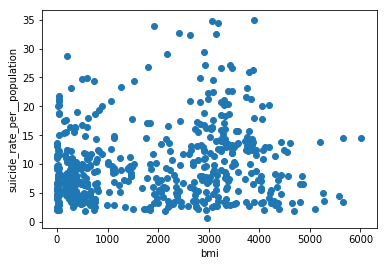

polio


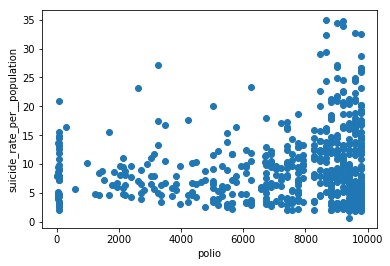

total_expenditure


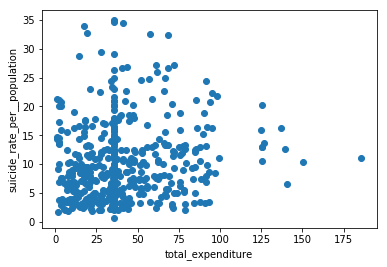

diphtheria


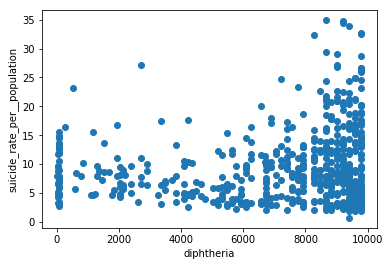

hivaids


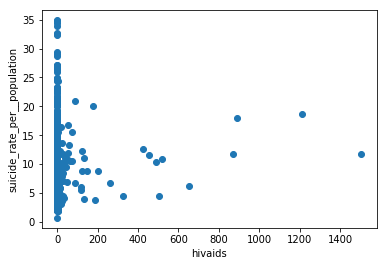

gdp


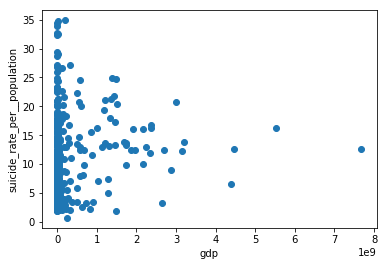

thinness___years


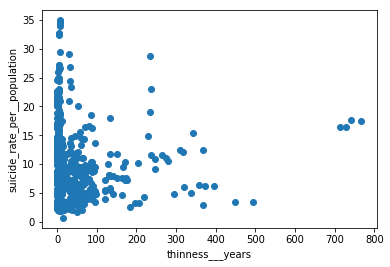

thinness__years


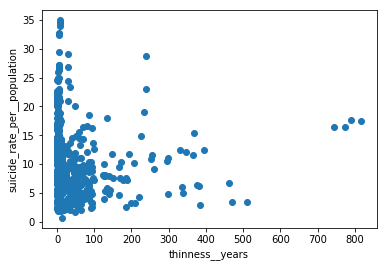

income_composition_of_resources


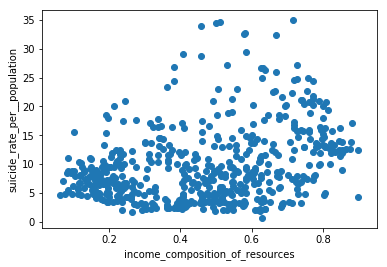

schooling


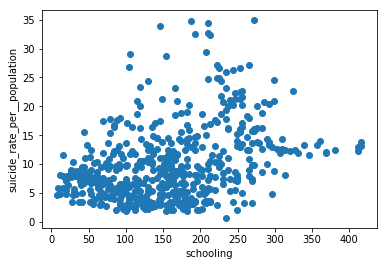

depressive_disorders_percentage_of_population


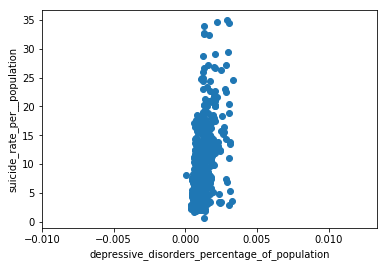

anxiety_disorders_percentage_of_population


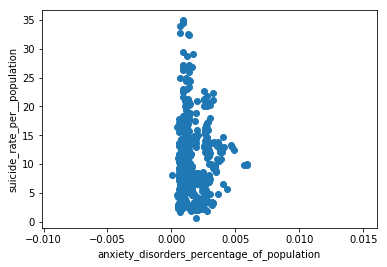

bipolar_disorder_percentage_of_population


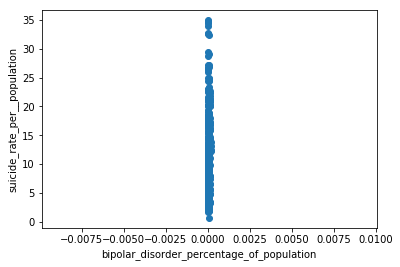

eating_disorders_percentage_of_population


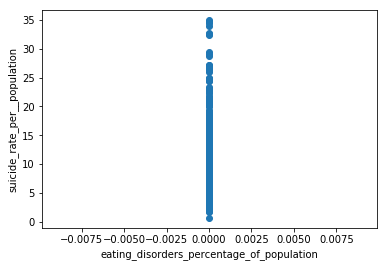

schizophrenia_percentage_of_population


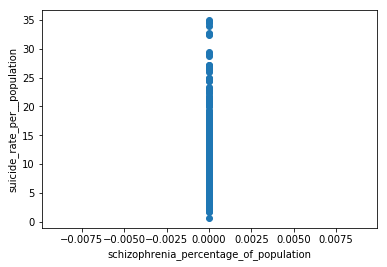

attentiondeficithyperactivity_disorder_percentage_of_population


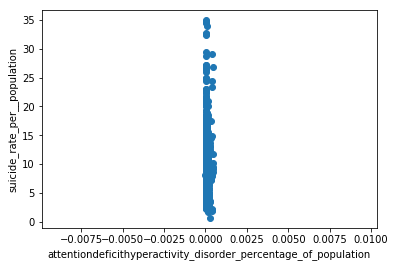

conduct_disorder_percentage_of_population


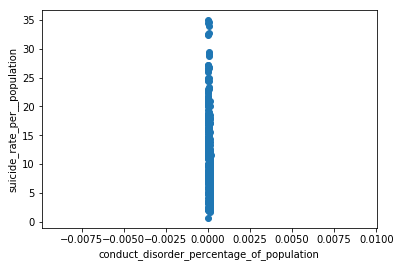

other_disorders_percentage_of_population


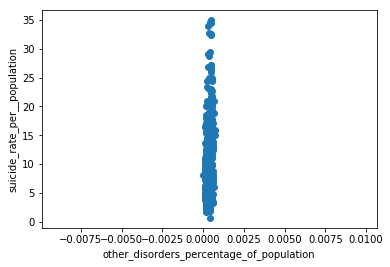

developmental_intellectual_disability_percentage_of_population


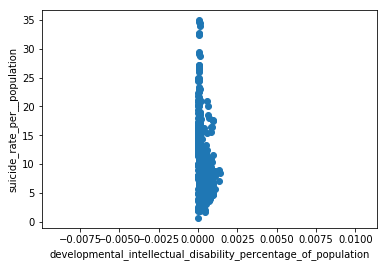

autistic_spectrum_disorders_percentage_of_population


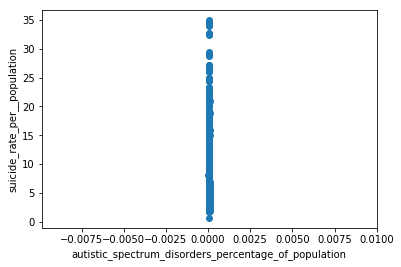

<Figure size 432x288 with 0 Axes>

In [71]:
#Plotting each squared feature against the target variable:
for i in range(sq_df.shape[1]-1):
    try:
        print(sq_df.columns[i])
        plt.scatter(sq_df.iloc[:, i], sq_df.iloc[:, 30])
        plt.xlabel(sq_df.columns[i])
        plt.ylabel(sq_df.columns[30])
        plt.show()
        plt.savefig('sq.png')
    except:
        pass

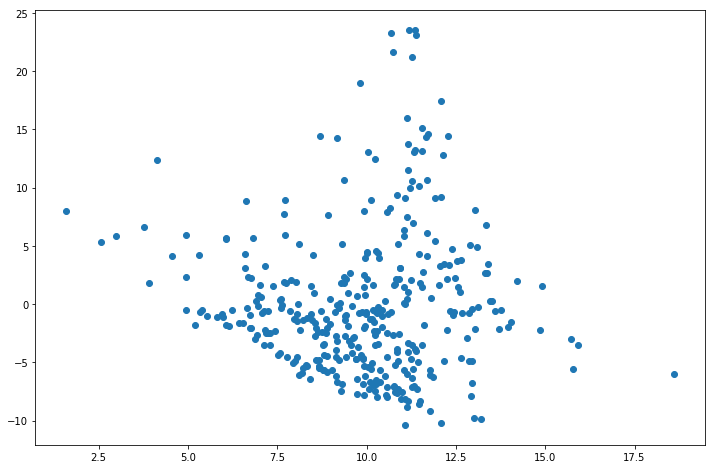

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);

### *Please note the above model was not included in the final powerpoint presentation due to the poor results. Subsequently model 5 and 6 in the code are referred to as model 4 and 5 in the presentation*

# Model 5 - Dropped features and mix log/square features

The below features were dropped for having large p-values

In [73]:
df_reduced = df.drop(columns={'infant_deaths', 'total_expenditure', 'diphtheria', 'thinness__years'})

In [74]:
df_reduced.head()

,country,year,corruption,population,life_expectancy,adult_mortality,alcohol,percentage_expenditure,measles,bmi,polio,hivaids,gdp,thinness___years,income_composition_of_resources,schooling,depressive_disorders_percentage_of_population,anxiety_disorders_percentage_of_population,bipolar_disorder_percentage_of_population,eating_disorders_percentage_of_population,schizophrenia_percentage_of_population,attentiondeficithyperactivity_disorder_percentage_of_population,conduct_disorder_percentage_of_population,other_disorders_percentage_of_population,developmental_intellectual_disability_percentage_of_population,autistic_spectrum_disorders_percentage_of_population,suicide_rate_per__population
0,Afghanistan,2000,1.390000,20093760.0,54.8,321.0,0.01,10.424960,6532.0,12.2,24.0,0.1,114.560000,2.3,0.338,5.5,0.029696,0.040120,0.005830,0.000694,0.000937,0.011535,0.010885,0.011772,0.033036,0.008567,1.740466
1,Afghanistan,2005,2.500000,25070798.0,57.3,291.0,0.02,1.388648,1296.0,14.2,58.0,0.1,25.294130,19.3,0.396,7.9,0.029651,0.040322,0.005893,0.000729,0.000943,0.011579,0.010822,0.011880,0.030955,0.008545,1.840550
2,Afghanistan,2010,1.400000,28803167.0,58.8,279.0,0.01,79.679367,1989.0,16.7,66.0,0.1,553.328940,18.4,0.448,9.2,0.029793,0.040746,0.005900,0.000798,0.000963,0.011704,0.011079,0.011920,0.028759,0.008593,1.629241
3,Afghanistan,2015,1.100000,33736494.0,65.0,263.0,0.01,71.279624,1154.0,19.1,6.0,0.1,584.259210,17.2,0.479,10.1,0.031112,0.042413,0.006241,0.000906,0.001018,0.011976,0.011279,0.012532,0.027784,0.008775,1.568616
4,Albania,2000,2.978571,3089030.0,72.6,11.0,3.66,91.711541,662.0,45.0,97.0,0.1,1175.788981,2.1,0.656,10.7,0.021446,0.032947,0.006136,0.000867,0.002036,0.008546,0.009118,0.017761,0.013201,0.008736,1.704748


In [75]:
df_reduced['income_composition_of_resources_sq'] = df_reduced['income_composition_of_resources'].apply(lambda x: x**2)

The below features were chosen to be logged and squared based on analysis the scatterplots against the target variable in models 3 and 4 (when they were logged and squared). Those features which became more linear in these 2 models were recreated here for model 5. 

In [76]:
df_reduced['corruption_log'] = df_reduced['corruption'].apply(np.log)
df_reduced['population_log'] = df_reduced['population'].apply(np.log)
df_reduced['bmi_log'] = df_reduced['bmi'].apply(np.log)
df_reduced['attentiondeficithyperactivity_disorder_percentage_of_population_log'] = df_reduced['attentiondeficithyperactivity_disorder_percentage_of_population'].apply(np.log)
df_reduced['developmental_intellectual_disability_percentage_of_population_log'] = df_reduced['developmental_intellectual_disability_percentage_of_population'].apply(np.log)


In [87]:
#OLS model 5 with some variables squared and some logged (referred to as model 4 in the ppt)
y, X = patsy.dmatrices('suicide_rate_per__population ~ corruption + population + life_expectancy + adult_mortality + alcohol + percentage_expenditure + measles + bmi + polio + hivaids + gdp + income_composition_of_resources + schooling + depressive_disorders_percentage_of_population + anxiety_disorders_percentage_of_population + bipolar_disorder_percentage_of_population + eating_disorders_percentage_of_population + schizophrenia_percentage_of_population + attentiondeficithyperactivity_disorder_percentage_of_population + conduct_disorder_percentage_of_population + other_disorders_percentage_of_population + developmental_intellectual_disability_percentage_of_population + autistic_spectrum_disorders_percentage_of_population', data=df_reduced, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=89)
model = sm.OLS(y_train, X_train)

fit = model.fit()

fit.summary()
y_predicted = fit.predict(X_test)
residuals = y_test.iloc[:,0] - y_predicted

In [79]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     suicide_rate_per__population   R-squared:                       0.503
Model:                                      OLS   Adj. R-squared:                  0.469
Method:                           Least Squares   F-statistic:                     15.07
Date:                          Sun, 21 Apr 2019   Prob (F-statistic):           2.60e-39
Time:                                  22:24:54   Log-Likelihood:                -243.35
No. Observations:                           367   AIC:                             534.7
Df Residuals:                               343   BIC:                             628.4
Df Model:                                    23                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                           1.8709      0.597      3.135      0.002       0.697       3.045
corruption                                                          0.0423      0.017      2.516      0.012       0.009       0.075
population                                                       5.667e-10   2.14e-10      2.646      0.009    1.45e-10    9.88e-10
life_expectancy                                                    -0.0143      0.008     -1.831      0.068      -0.030       0.001
adult_mortality                                                     0.0011      0.000      3.514      0.000       0.000       0.002
alcohol                                                             0.0409      0.010      4.226      0.000       0.022       0.060
percentage_expenditure                                           3.887e-05   2.14e-05      1.813      0.071    -3.3e-06     8.1e-05
measles                                                          -1.17e-06   1.65e-06     -0.710      0.478   -4.41e-06    2.07e-06
bmi                                                                -0.0004      0.002     -0.213      0.831      -0.004       0.003
polio                                                               0.0014      0.001      1.142      0.254      -0.001       0.004
hivaids                                                            -0.0088      0.007     -1.225      0.221      -0.023       0.005
gdp                                                             -1.227e-06   3.32e-06     -0.369      0.712   -7.76e-06    5.31e-06
income_composition_of_resources                                    -0.5693      0.448     -1.270      0.205      -1.451       0.312
schooling                                                           0.0068      0.019      0.356      0.722      -0.031       0.044
depressive_disorders_percentage_of_population                      30.7029      5.020      6.116      0.000      20.829      40.577
anxiety_disorders_percentage_of_population                        -10.9833      4.442     -2.473      0.014     -19.721      -2.246
bipolar_disorder_percentage_of_population                         -37.0157     33.054     -1.120      0.264    -102.030      27.999
eating_disorders_percentage_of_population                        -107.7000     61.811     -1.742      0.082    -229.276      13.876
schizophrenia_percentage_of_population                            -71.5560     94.197     -0.760      0.448    -256.833     113.721
attentiondeficithyperactivity_disorder_percentage_of_population   -15

In [80]:
df_reduced.to_pickle('model1_df.pkl')

In [81]:
#Calculating root mean squared error for model 5
rmse = sqrt(mean_squared_error(y_test, y_predicted))
rmse

0.47244499950028007